# Abhiraj Singh (NeuroFlow Data Team Take-Home Project) 

# IMPORT LIBRARY

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ADDITIONAL INFORMATION: 
AGE, GENDER, Prior Clinical history of the patient can also be helpful for the deeper analysis.

ASSUMPTIONS: For this dataset, I have assumed that the sample data is equivalent and sufficient for the analysis of the progress.



# READ FILE

In [2]:
df = pd.read_csv('phq_all_final.csv')
df.head(5)

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9


# DATA EXPLORATION & VISUALIZATION

In [3]:
df['date'] = pd.to_datetime(df['date'])
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
patient_id,53698.0,9223.263585,5284.140056,0.0,4697.0,9227.5,13808.75,18400.0
score,53698.0,4.784592,5.246969,0.0,1.0,3.0,7.00,21.0


In [5]:
#The below code will provide a tuple with patient_id and thier repective progress

patients=df['patient_id'].unique()
progress=[]
for patient in patients:
  patientRecord= df[df['patient_id']==patient].sort_values(['date'])
  progressDiff= (patientRecord['score'].iloc[-1])-(patientRecord['score'].iloc[0])
  progress.append((patient,progressDiff))

sorted_progress = sorted(progress, key=(lambda k: k[1]))

In [6]:
#The below function builds a progress tracker that take the patient_id and show their score with time.

def patient_progress(pid):
  ptientReport=df[df['patient_id']==pid]
  plt.figure(figsize=(14,7)) # Make it 14x7 inch
  plt.plot(ptientReport['date'],ptientReport['score'])
  plt.title('Progress Tracker') 
  plt.xlabel('DATE') 
  plt.ylabel('GAD7_SCORE') 
  plt.show()  


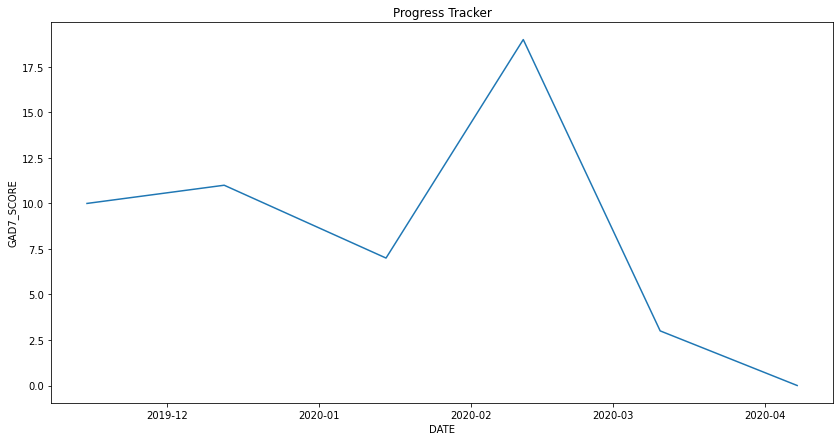

In [13]:
#Function demo for patient_id 469

patient_progress(469)

In [8]:
#Proof that the function is working properly
df[df['patient_id']==469]

,date,patient_id,type,patient_date_created,score
13632,2019-11-14 16:14:10.543435,469,gad7,2019-10-10T17:36:21.054077,10
13633,2019-12-12 16:02:03.478480,469,gad7,2019-10-10T17:36:21.054077,11
13634,2020-01-14 16:32:33.172905,469,gad7,2019-10-10T17:36:21.054077,7
13635,2020-02-11 16:35:19.960869,469,gad7,2019-10-10T17:36:21.054077,19
13636,2020-03-10 14:56:38.706899,469,gad7,2019-10-10T17:36:21.054077,3
13637,2020-04-07 13:46:51.107384,469,gad7,2019-10-10T17:36:21.054077,0


In [11]:
progress_df = pd.DataFrame(list(sorted_progress))
progress_df.head(5)

,0,1
0,15648,-21
1,17863,-21
2,10667,-21
3,17088,-20
4,5089,-20


# Progress visualization for Top scores:

The Below plots will show the decrease of GAD07 value for the patients.

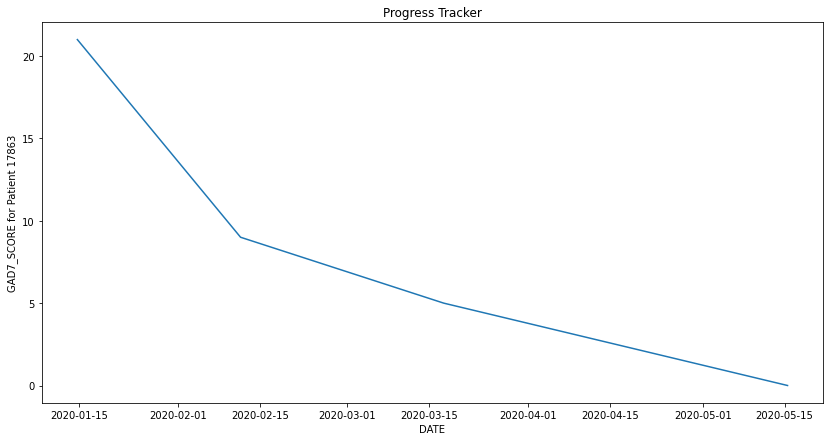

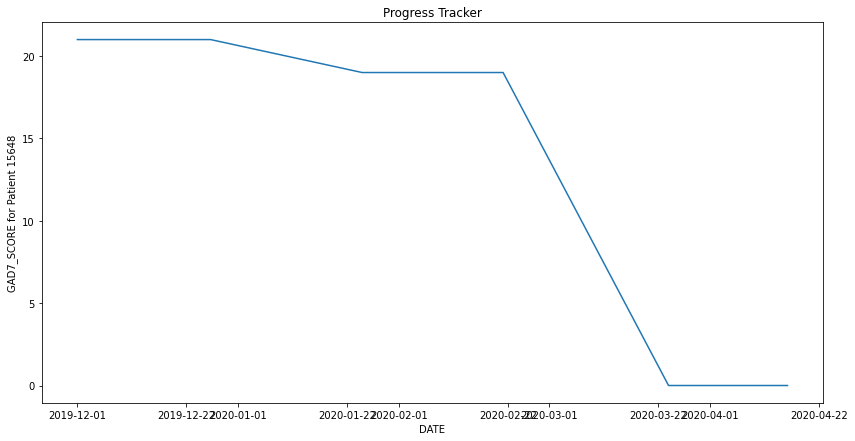

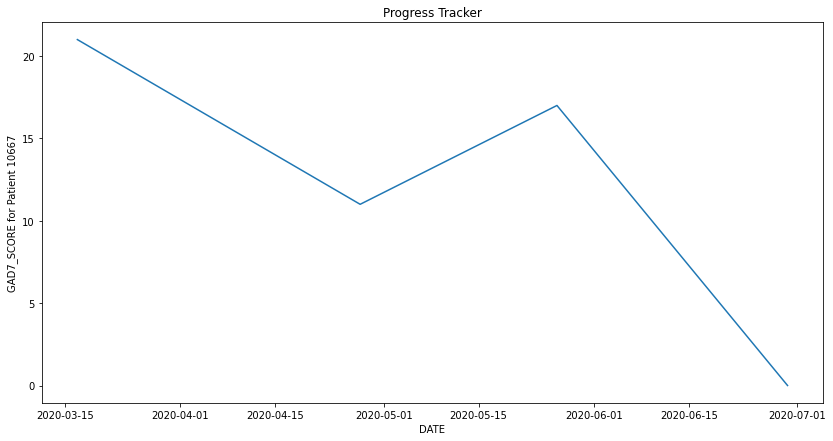

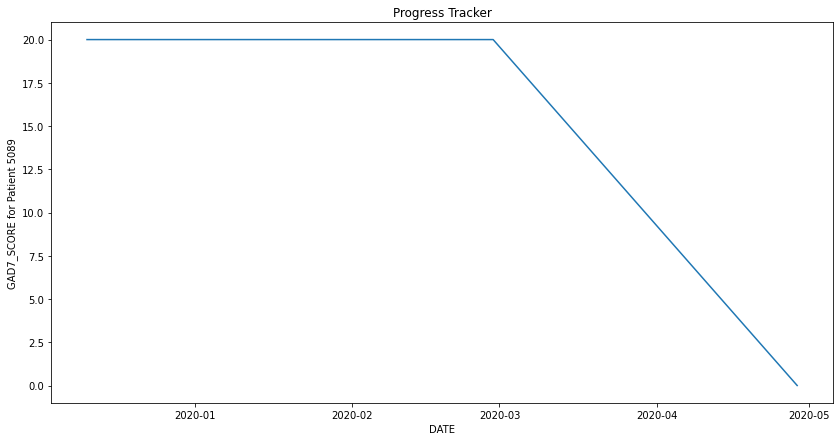

In [15]:
lst = [17863, 15648, 10667, 5089]

for val in lst:

  ptientReport=df[df['patient_id']==val]
  plt.figure(figsize=(14,7)) # Make it 14x7 inch
  plt.plot(ptientReport['date'],ptientReport['score'])
  plt.title('Progress Tracker') 
  plt.xlabel('DATE') 
  plt.ylabel('GAD7_SCORE for Patient ' + str(val)) 
  plt.show() 


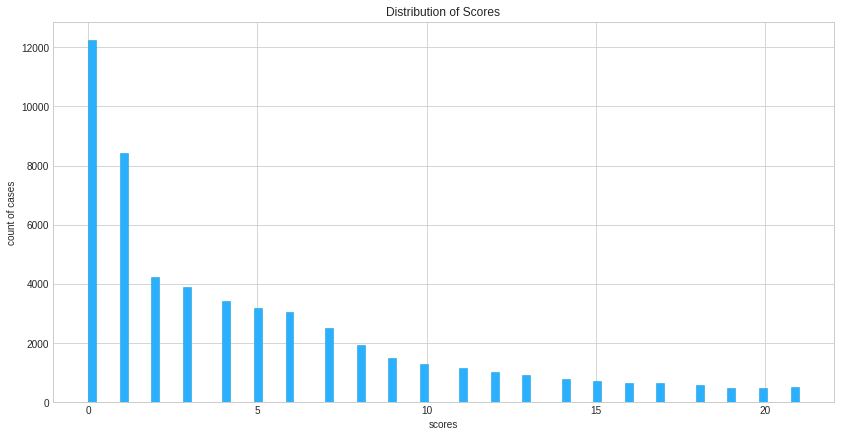

In [20]:
#The below plot shows the distribution of score and the count

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(df['score'], bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Distribution of Scores') 
plt.xlabel('scores') 
plt.ylabel('count of cases') 
plt.show()

In [21]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

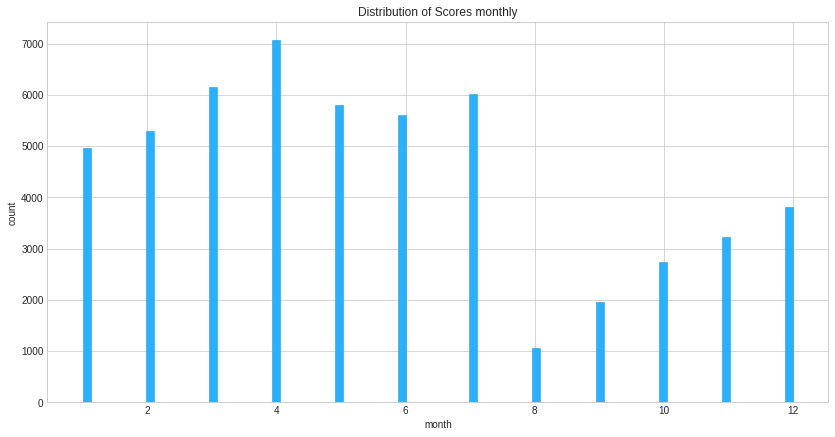

In [22]:
#The below plot shows the distribution of scores monthly

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(df['month'], bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Distribution of Scores monthly') 
plt.xlabel('month') 
plt.ylabel('count') 
plt.show()

In [28]:
df_month_avg_score = df.groupby(['month']).mean('score')
df_month_avg_score['score'].head(12)

month
1     4.609530
2     4.705882
3     4.647450
4     4.508767
5     4.235467
6     4.634447
7     5.089048
8     6.922212
9     6.174359
10    5.200073
11    4.914966
12    4.711589
Name: score, dtype: float64

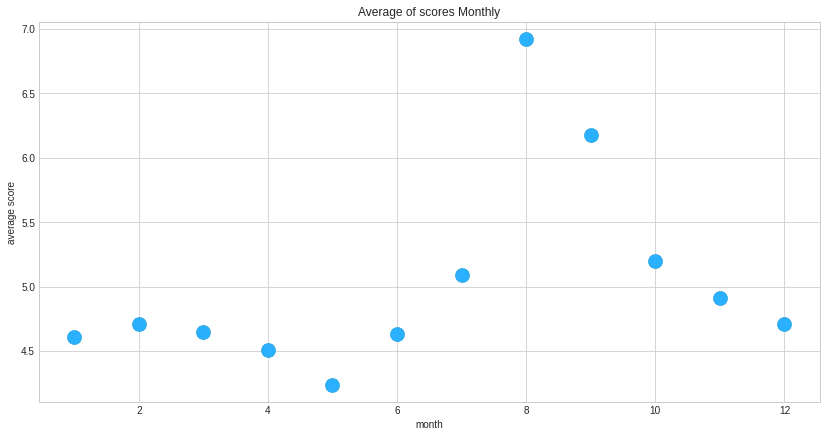

In [29]:
#the below visualization shows the monthly average score 

month = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.scatter(month,df_month_avg_score['score'], facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5, s=200)
plt.title('Average of scores Monthly') 
plt.xlabel('month') 
plt.ylabel('average score') 
plt.show()